In [61]:
# importing different libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

In [62]:
# read data
df=pd.read_csv(r"C:\Users\plane\Downloads\water_quality_.csv")

# Reading data
df.head() # first 5 rows are shown

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
0,NaN,204.890456,20791.31898,7.300212,368.516441,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,11.558279,31.997993,4.075075,0


In [63]:
# check non null counts and 
# replace null values with mean
df.info()
df = df.fillna(df.mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Organic_carbon   3276 non-null   float64
 6   Trihalomethanes  3114 non-null   float64
 7   Turbidity        3276 non-null   float64
 8   Check            3276 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 230.5 KB


In [64]:
df.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690300,6.127421,317.094638,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833605,7.130299,333.775777,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.385756,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,28.300000,124.000000,6.739000,1.000000


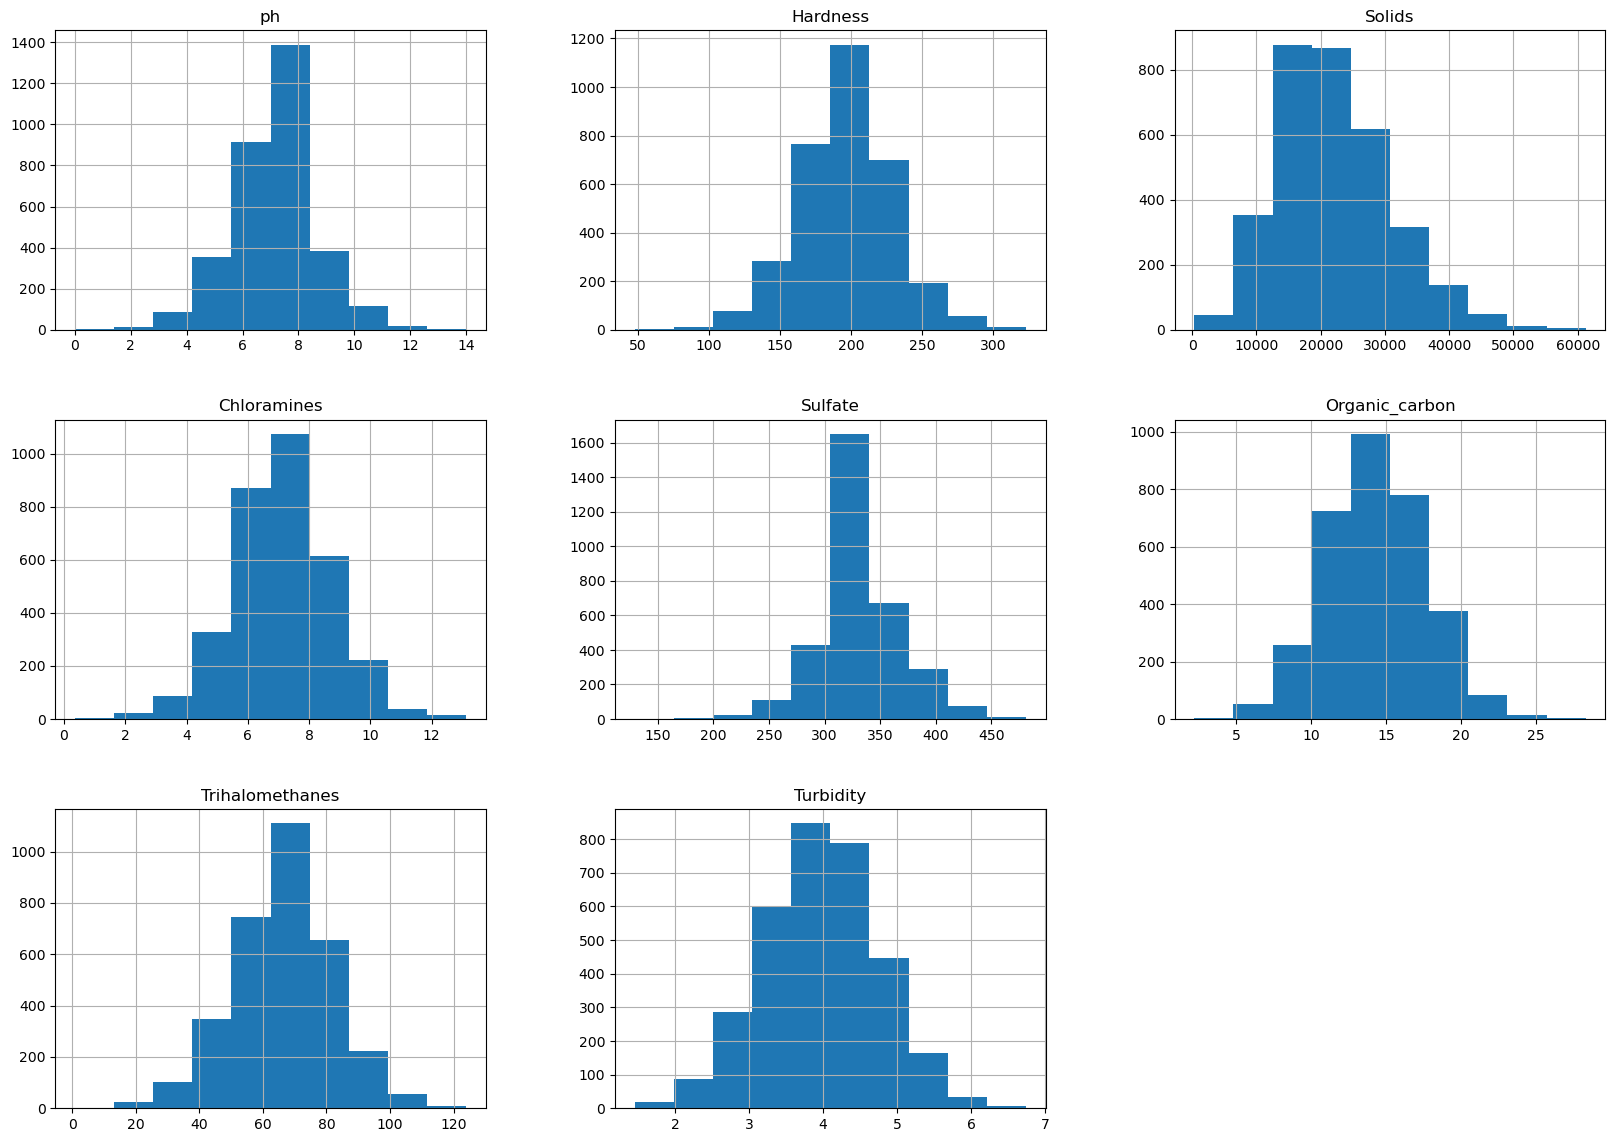

In [65]:
# Create histograms to visualize the distribution of numerical variables

#bins-no. of bins/intervals in histogram
# figsize=(12, 8): This parameter sets the size of the figure (the entire plot). 
# It is a tuple representing the width and height of the figure in inches. 
# In this case, the width is set to 12 inches, and the height is set to 8 inches.

hist_cols=['ph','Hardness','Solids','Chloramines','Sulfate','Organic_carbon','Trihalomethanes','Turbidity']
df[hist_cols].hist(bins=10, figsize=(20, 14))

plt.show()

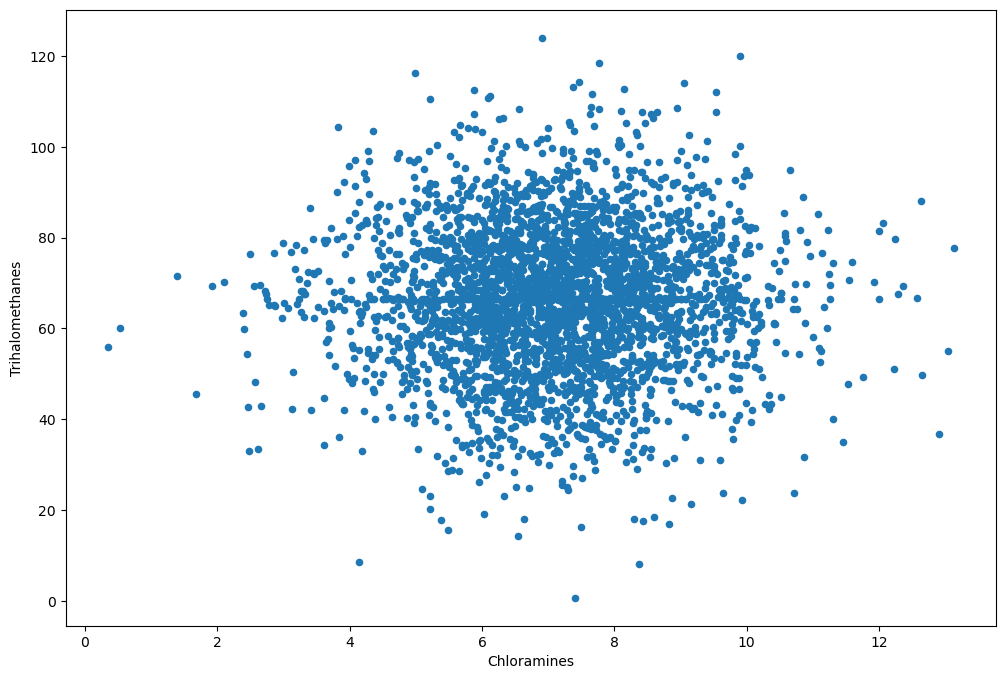

In [66]:

df.plot.scatter(x='Chloramines', y='Trihalomethanes', figsize=(12, 8))
plt.show()


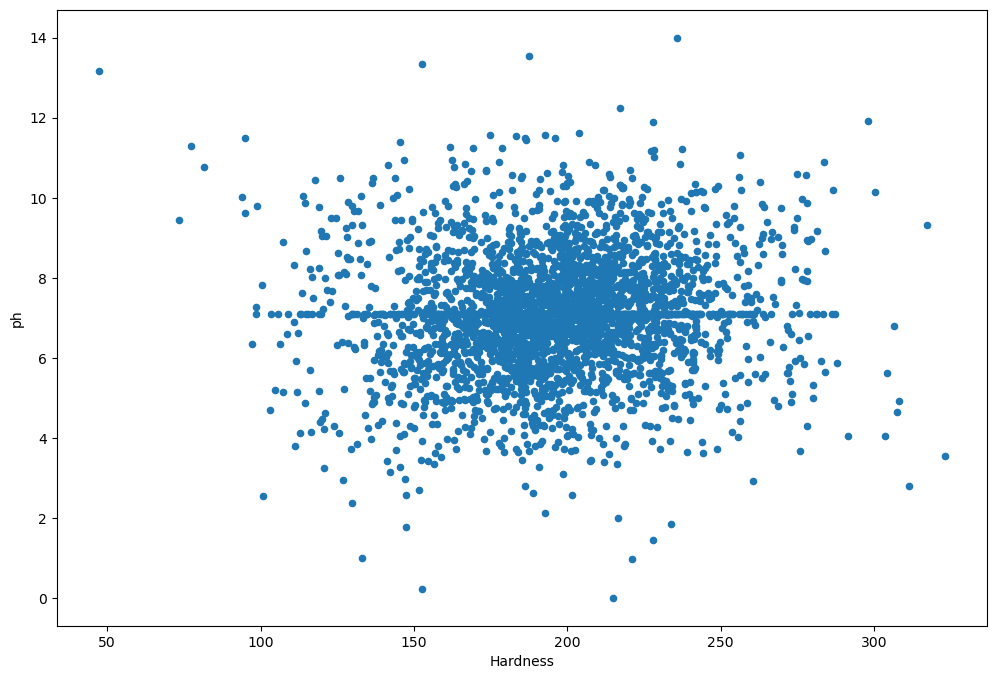

In [67]:

filtered_df.plot.scatter(x='Hardness', y='ph', figsize=(12, 8))
plt.show()


Normalization of Data

In [73]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X is your feature matrix
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0.50577104 0.57113901 0.33609646 ... 0.31340165 0.69975313 0.28609102]
 [0.26543429 0.29740043 0.30061142 ... 0.49731851 0.4509993  0.57679264]
 [0.57850887 0.64131081 0.32161885 ... 0.56201674 0.5328657  0.30363656]
 ...
 [0.67282217 0.46548556 0.53910122 ... 0.33866167 0.56065454 0.34956996]
 [0.36619735 0.66440723 0.19148981 ... 0.34363779 0.62265916 0.61611996]
 [0.56247653 0.53563505 0.28048408 ... 0.5341137  0.63247754 0.16244074]]


# Model building

In [74]:
# Splitting Data for Modeling
X=df.drop(['Check'], axis=1)
y=df.Check


In [75]:

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=68)
# train_test_split to check the best model 
# accuracy_score to check the accuracy_score of model 
# each int in random state refers to specific split of data into test and train
print(len(X_train),len(y_train),len(X_test),len(y_test))

2457 2457 819 819


In [77]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression()
model_1.fit(X_train,y_train)
predictions_1=model_1.predict(X_test)





print(accuracy_score(y_test, predictions_1))


print(y_test)

print(predictions_1)

0.6031746031746031
1631    1
2097    0
2539    0
1337    0
2320    1
       ..
1304    0
1410    0
2312    1
283     1
1217    1
Name: Check, Length: 819, dtype: int64
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

In [78]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_estimators=50)
model_2.fit(X_train, y_train)
predictions_2=model_2.predict(X_test)





print(accuracy_score(y_test, predictions_2))
print(y_test)
print(predictions_2)

0.6544566544566545
1631    1
2097    0
2539    0
1337    0
2320    1
       ..
1304    0
1410    0
2312    1
283     1
1217    1
Name: Check, Length: 819, dtype: int64
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0
 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

In [75]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, predictions)
print("Confusion Matrix for Logistic Regression:")
print(confusion)

confusion = confusion_matrix(y_test, predictions_2)
print("Confusion Matrix for RandomForestClassifier:")
print(confusion)


Confusion Matrix for Logistic Regression:
[[505   0]
 [314   0]]
Confusion Matrix for RandomForestClassifier:
[[445  60]
 [215  99]]
